In [1]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
from qiskit import transpile
import matplotlib.pyplot as plt
service = QiskitRuntimeService(channel="ibm_quantum", token="44a13b767d3fc363237ecb5598da28411308e2a26507478b13a804a3b18b5d160d503f1713f7daec93840f362c63f0e25c8d1be51258e448606a89eda70dd3e5")


# Confirm that Certain Quantum Gates Behave Like Classical Gates: 
### a CNOT gate behaves like an XOR gate in classic computing.
The CNOT gate flips the target qubit if the control qubit is in the state 1. This is equivalent to the behavior of an XOR gate.
### a Toffoli gate behaves like an AND gate in classic computing.
The Toffoli gate flips the target qubit if both control qubits are in the state 1, which is equivalent to the behavior of an AND gate.

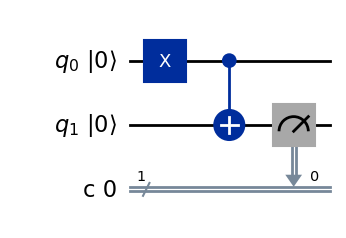

In [2]:
cnot_circuit = QuantumCircuit(2, 1)

cnot_circuit.x(0)
# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
cnot_circuit.cx(0, 1)

# Measure both qubits
cnot_circuit.measure(1,0)
cnot_circuit.draw(plot_barriers=True, initial_state=True, scale=1, output='mpl')


{'1': 10000}


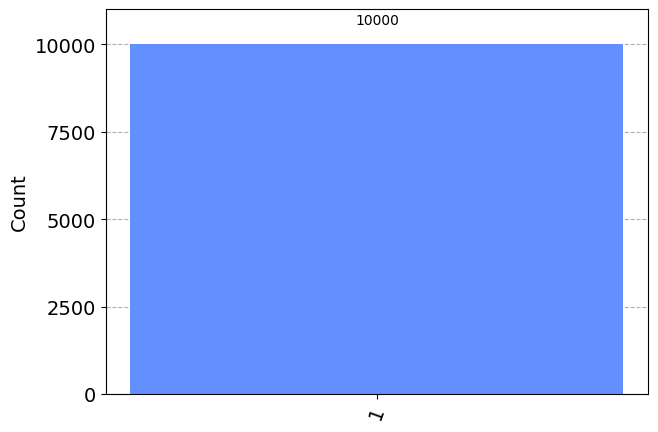

In [3]:
backend = Aer.get_backend('qasm_simulator')
counts = backend.run(cnot_circuit, shots=10000).result().get_counts()

# Print the counts
print(counts)

# Plot the histogram of the counts
plot_histogram(counts)


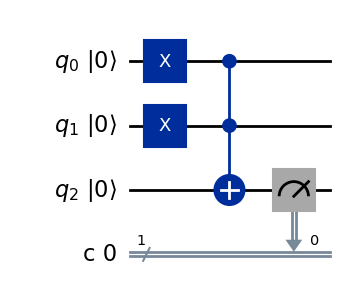

In [4]:
# Create a quantum circuit with 3 qubits and 1 classical bit
toffoli_circuit = QuantumCircuit(3, 1)

# Set control qubits (qubits 0 and 1) to state '1' and '0' respectively
# Set target qubit (qubit 2) to state '0'
toffoli_circuit.x(0)  # Set qubit 0 to 1
toffoli_circuit.x(1)  # Initialize target qubit to 0
# Apply a Toffoli gate with qubit 0 and qubit 1 as control qubits and qubit 2 as target
toffoli_circuit.ccx(0, 1, 2)

# Measure the target qubit
toffoli_circuit.measure(2, 0)
toffoli_circuit.draw(plot_barriers=True, initial_state=True, scale=1, output='mpl')


{'1': 10000}


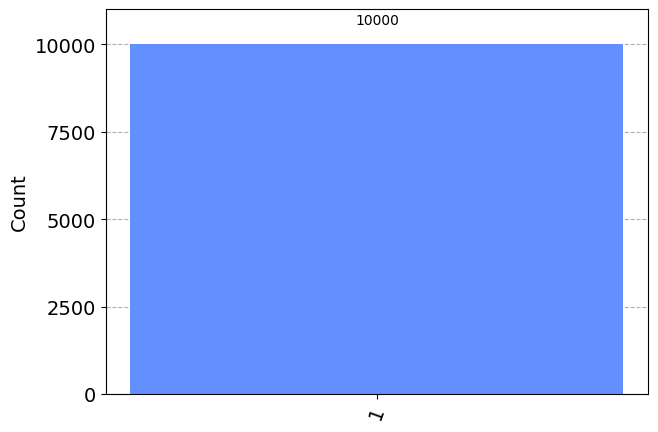

In [5]:
backend = Aer.get_backend('qasm_simulator')
counts = backend.run(toffoli_circuit, shots=10000).result().get_counts()

# Print the counts
print(counts)

# Plot the histogram of the counts
plot_histogram(counts)


# Demonstrating the Sum and Carry Quantum Equivalent Gates
### The below circuit shows a half adder, using a SUM and CARRY, with q0 = bit A; q1 = bit B. q3 has the SUM output and q4 has the CARRY output.

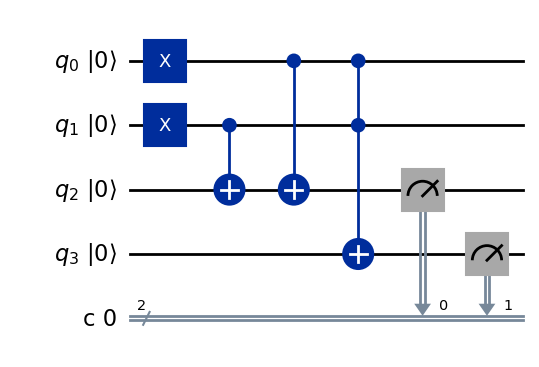

In [6]:
# Sum and Carry, with q0 and q0 being input bits A and B, respectively

SAC = QuantumCircuit(4,2)
SAC.x(0)
SAC.x(1)

# XOR gate (SUM)
SAC.cx(1,2)
SAC.cx(0,2)

SAC.ccx(0,1,3) # AND gate (Carry)

SAC.measure(2, 0)
SAC.measure(3, 1)

SAC.draw(plot_barriers=True, initial_state=True, scale=1, output='mpl')



{'10': 10000}


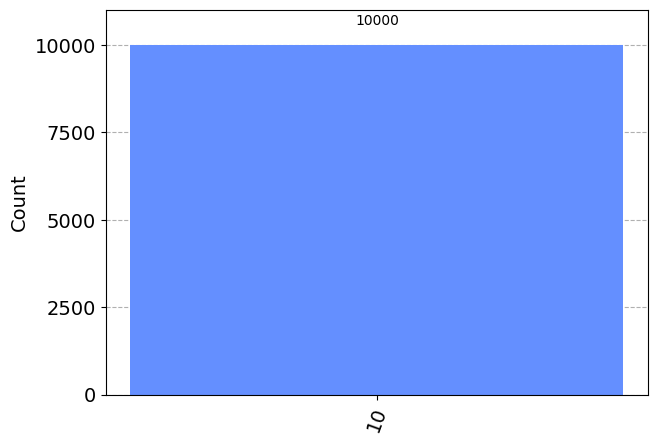

In [7]:
backend = Aer.get_backend('qasm_simulator')
counts = backend.run(SAC, shots=10000).result().get_counts()

# Print the counts
print(counts)

# Plot the histogram of the counts
plot_histogram(counts)


# Full Adder
## Basic Quantum Full Adder
### Below is a demonstration of a Full Adder quantum equivalent circuit, for Cin, bit A and bit B. This essentially makes use of two XOR gates, two AND gates and one OR gate. q4 is the S output and q7 is Cout.

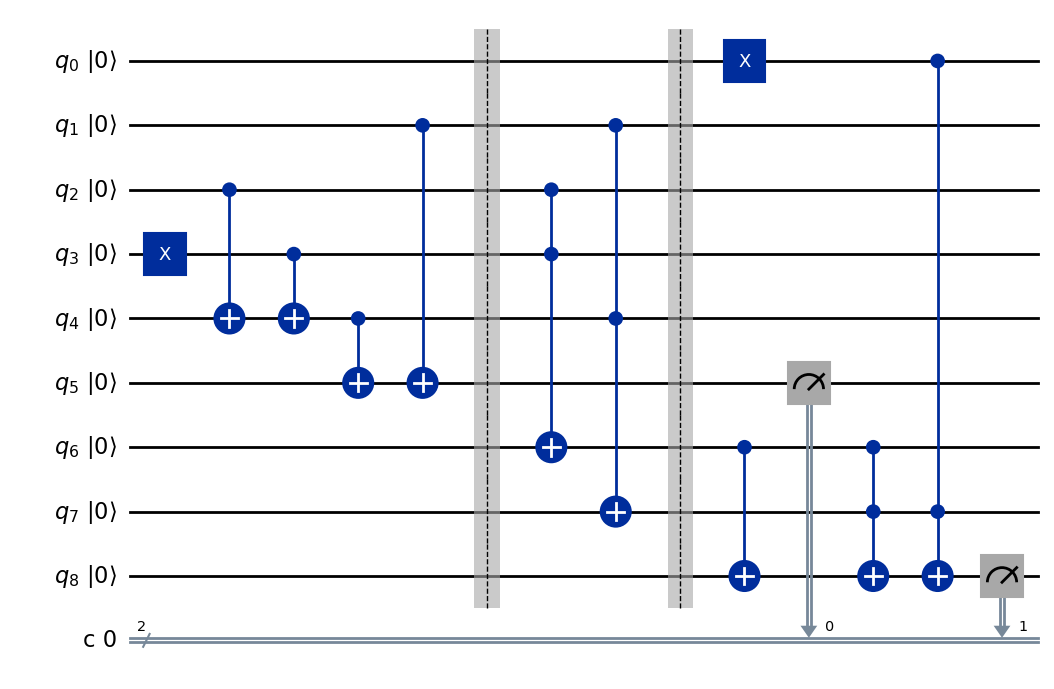

In [8]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 9 qubits and 2 classical bits
qc = QuantumCircuit(9, 2)

# Set up initial state
# qc.x(1) 
# qc.x(2)  
qc.x(3)  

# Apply operations for the quantum FA
qc.cx(2, 4)  
qc.cx(3, 4) 
qc.cx(4, 5)  
qc.cx(1, 5)  
qc.barrier()  # Barrier for clarity

qc.ccx(2, 3, 6)  
qc.ccx(1, 4, 7)  
qc.barrier()  


qc.x(0)
qc.cx(6, 8)
qc.ccx(6, 7, 8)
qc.ccx(0, 7, 8)

qc.measure(5, 0)  
qc.measure(8, 1)  

# Draw the circuit
qc.draw(plot_barriers=True, initial_state=True, scale=1, output='mpl')


{'01': 10000}


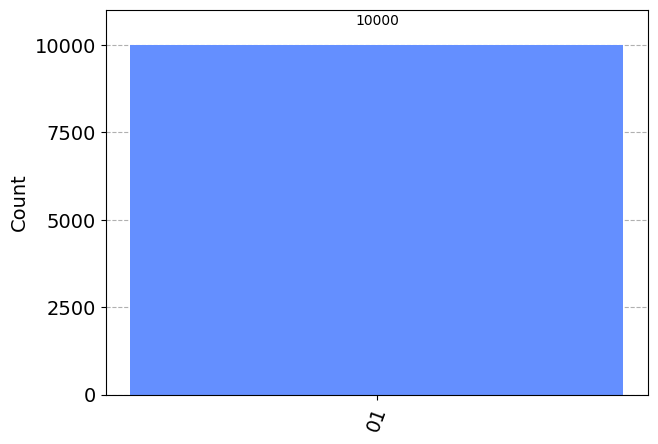

In [9]:
# Execute the quantum circuit
backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc, shots=10000).result()
counts = result.get_counts(qc)
print(counts)

# Plot histogram
plot_histogram(counts)


# A Cleaner Solution
### A Dynamic 4-bit Full Adder Ripple Adder
The Full Adder circuit above is complicated and inefficient, so a simplified version is used, from the following paper:

"Hawash, Amjad & Awad, Ahmed & Abdalhaq, Baker. (2020). Reversible Circuit Synthesis Time Reduction Based on Subtree-Circuit Mapping. Applied Sciences. 10. 4147. 10.3390/app10124147." [Reversible Circuit Synthesis: Time Reduction Based on Subtree-Circuit Mapping](https://www.researchgate.net/publication/342200329_Reversible_Circuit_Synthesis_Time_Reduction_Based_on_Subtree-Circuit_Mapping)


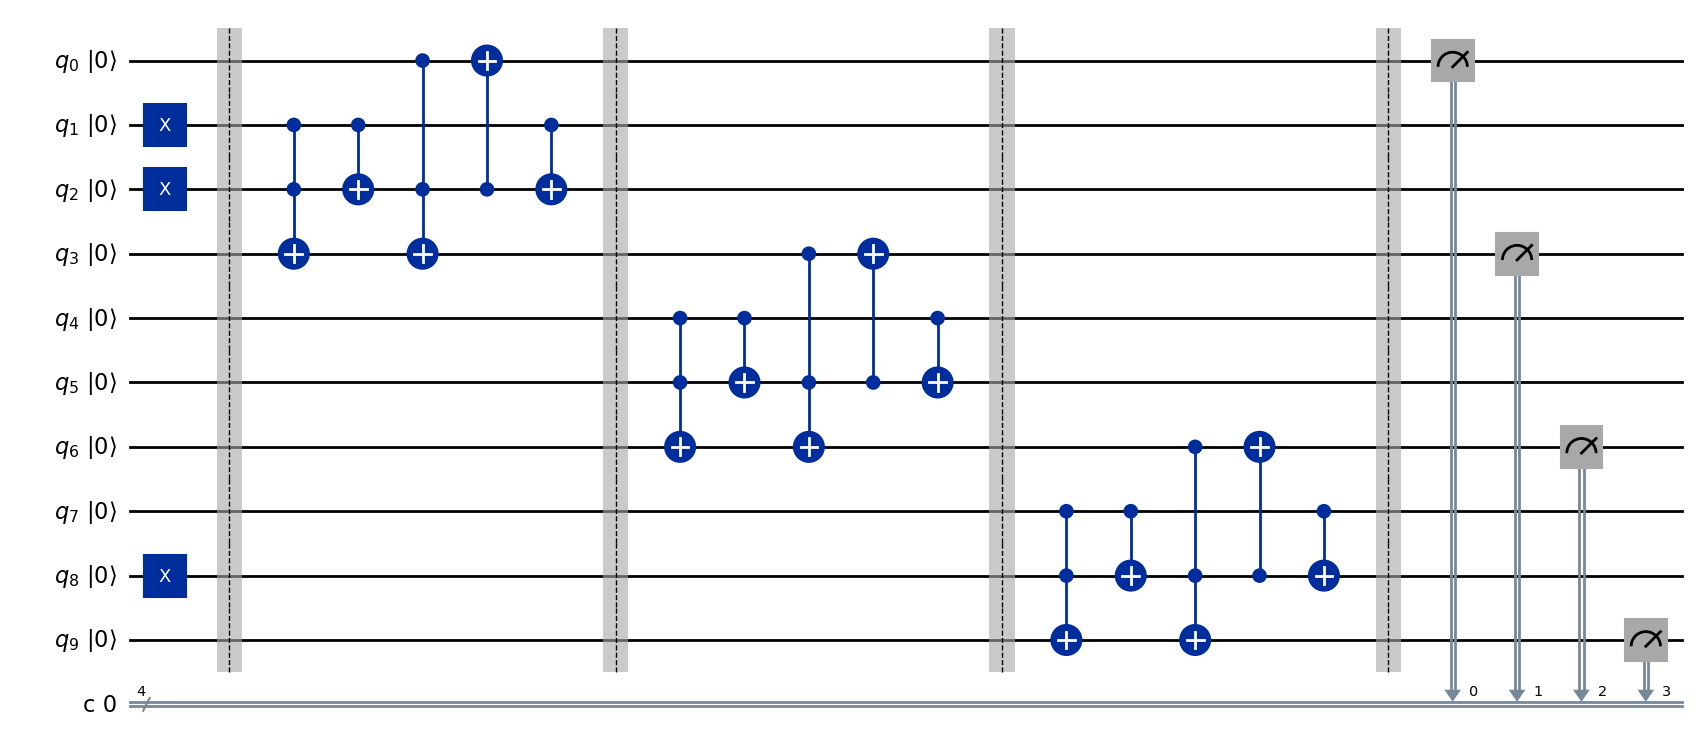

In [10]:
from qiskit import QuantumCircuit

# a_input and b_input should be binary strings. This function works for n>2 bits.
a_input = "001"  # User input for A
b_input = "101"  # User input for B
n = len(a_input) # Number of bits of numbers added

# Define the full adder function using the provided circuit template
def full_adder(qc, a_input, b_input):
    # Initialize the qubits based on user inputs in little-endian order. This is for easy comparison with online binary calculators.
    a_input = a_input[::-1]
    b_input = b_input[::-1]
    for i in range(n):
        # Initialize qubits for "A" inputs (little-endian order)
        if a_input[i] == '1':
            qc.x(3 * i + 1)  # Map a_input[i] to qubit at position 3*i
        
        # Initialize qubits for "B" inputs (little-endian order)
        if b_input[i] == '1':
            qc.x(3 * i + 2)  # Map b_input[i] to qubit at position 3*i + 2
    
    # Add the barriers as in the provided template
    qc.barrier()

    # Apply Toffoli (ccx) and CNOT (cx) gates for the full adder function
    qc.ccx(1, 2, 3)
    qc.cx(1, 2)
    qc.ccx(0, 2, 3)
    qc.cx(2, 0)
    qc.cx(1, 2)
    qc.barrier()


    # Repeat for n blocks of qubits as specified by the input `n`
    for offset in range(3, 3 * (n), 3):
        # Apply Toffoli (ccx) and CNOT (cx) gates for each block
        qc.ccx(1 + offset, 2 + offset, 3 + offset)
        qc.cx(1 + offset, 2 + offset)
        qc.ccx(0 + offset, 2 + offset, 3 + offset)
        qc.cx(2 + offset, 0 + offset)
        qc.cx(1 + offset, 2 + offset)
        qc.barrier()

    # Measure the specified qubits and store results in classical bits
    qc.measure([3 * i for i in range(n + 1)], [i for i in range(n + 1)])

    # Return the circuit
    return qc


qc = QuantumCircuit(n*n + 1 ,n + 1)
qc = full_adder(qc, a_input, b_input)

# Draw the circuit using the 'mpl' format
qc.draw(plot_barriers=True, initial_state=True, scale=1, output='mpl')


{'0110': 10000}


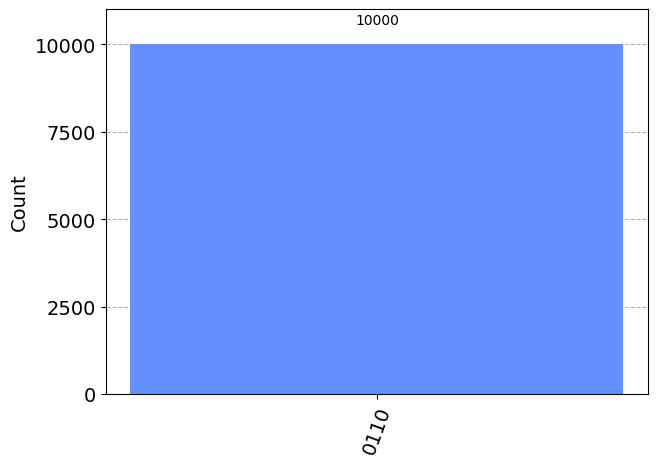

In [11]:
backend = Aer.get_backend('qasm_simulator')
counts = backend.run(qc, shots=10000).result().get_counts()

# Print the counts
print(counts)

# Plot the histogram of the counts
plot_histogram(counts)

### IBM Sherbrooke with 1.7% EPLG
This performs unpredictably with each experiment, which is another testament to the compounding error with more qubits in the transpiled circuit. In this example, the correct answer of 0110 was reached 562/10000 i.e. 5.62% of shots, in the previous run, and in the job below, a 6.07% accuracy is achieved, so the 3-bit adder cannot be expected to have higher than a 5% accuracy. The number of gates in the transpiled qc is shown below to be 566, excluding measure and barrier gates, in contrast with the theoretical 18 gates needed for a quantum 3-bit full adder (three X gates, for the three 1 bits; three CNOT and two Toffoli per bit being added, ignoring measure and barriers, because these are not increased with the scale of transpilation).

{'1101': 203, '0100': 785, '1000': 1364, '1001': 156, '1111': 188, '1011': 146, '1110': 1333, '0001': 164, '1100': 1578, '0011': 126, '0110': 607, '0111': 91, '0101': 114, '1010': 1048, '0000': 1292, '0010': 805}


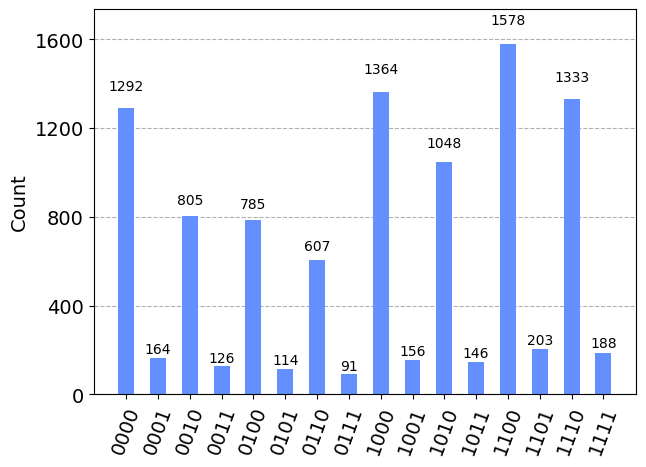

In [12]:
realBackend = service.get_backend("ibm_sherbrooke")

transpiled_qc = transpile(qc, backend=realBackend)

counts = realBackend.run(transpiled_qc, shots=10000).result().get_counts()

print(counts)

plot_histogram(counts)


### IBM Kyoto with 3.6% EPLG
This performs unpredictably with each experiment as well, but should, in general, have slightly lower accuracy than that from IBM Sherbrooke. The same circuit run on the Kyoto machine shows a % accuracy in the below example.

In [13]:
# Count the operations in the transpiled circuit
gate_count = transpiled_qc.count_ops()

# Print the gate count dictionary
print("Gate count in the transpiled circuit:")
print(gate_count)

Gate count in the transpiled circuit:
OrderedDict([('rz', 199), ('sx', 127), ('ecr', 72), ('x', 34), ('barrier', 4), ('measure', 4)])


{'1110': 934, '0011': 195, '1000': 904, '0001': 206, '0010': 1372, '1100': 1162, '1101': 167, '0101': 162, '1010': 1190, '1011': 163, '1111': 106, '1001': 150, '0000': 1213, '0110': 910, '0100': 1050, '0111': 116}


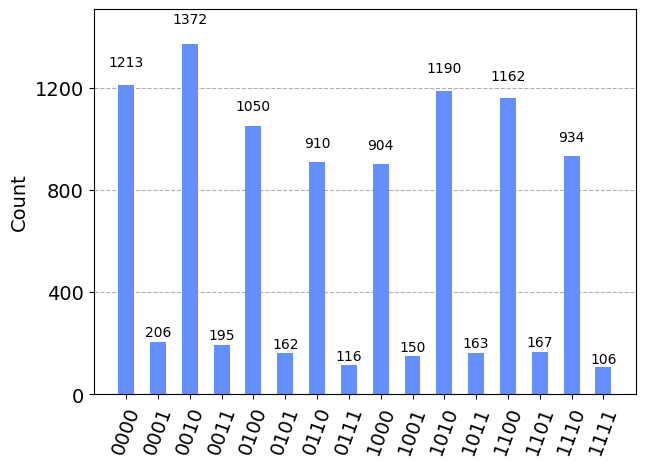

In [14]:
realBackend = service.get_backend("ibm_kyoto")

transpiled_qc = transpile(qc, backend=realBackend)

counts = realBackend.run(transpiled_qc, shots=10000).result().get_counts()

print(counts)

plot_histogram(counts)


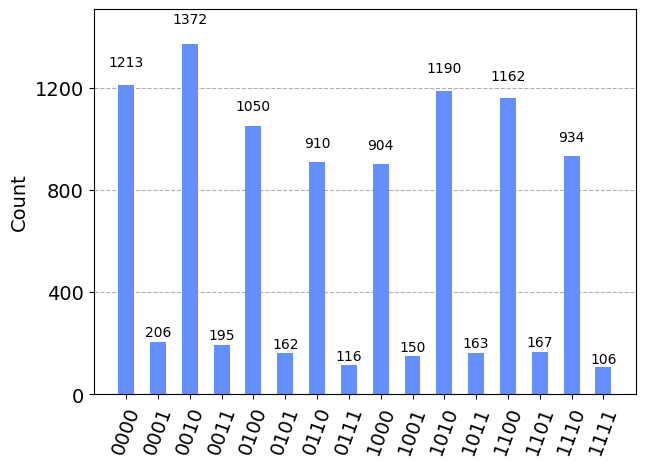

In [15]:
plot_histogram(counts)

# 5-bit Addition
This expectedly performed badly with each experiment, due to the even greater error compounding than the 3-bit adder, because of the necessary extra qubits. The accuracy in the below experiment is only 50/10000 i.e. 0.5%.

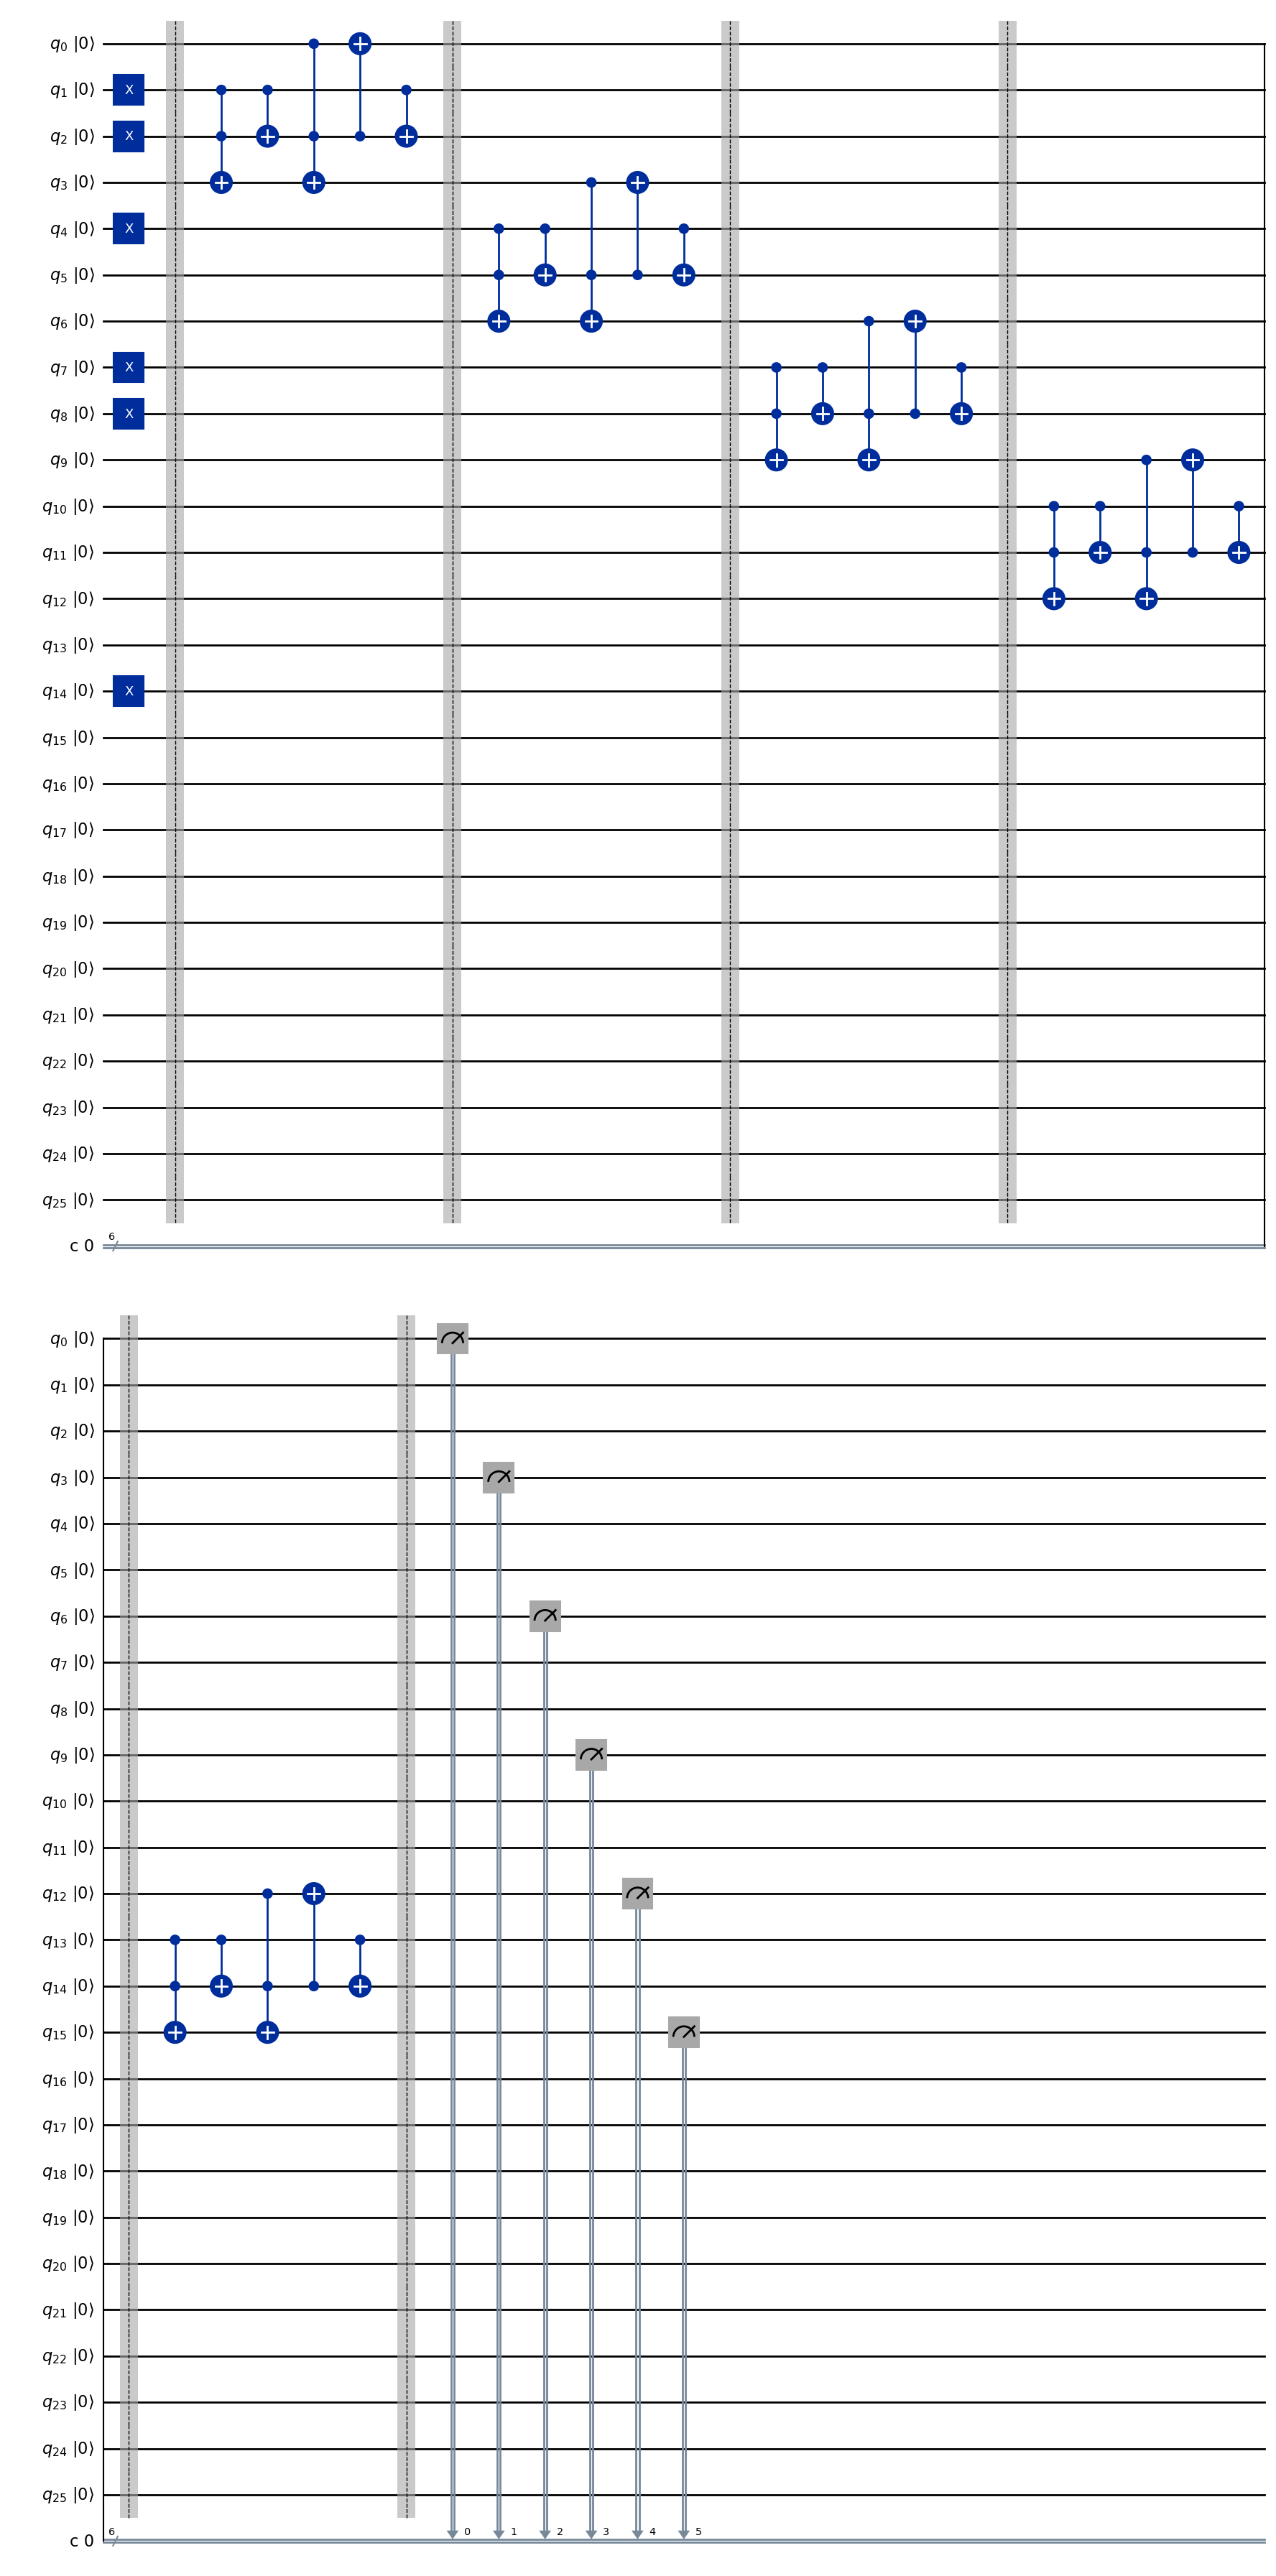

In [16]:
# a_input and b_input should be binary strings 
a_input = "00111"  # User input for A
b_input = "10101"  # User input for B
n = len(a_input) # Number of bits of numbers added

qc = QuantumCircuit(n*n +1 ,n + 1)
qc = full_adder(qc, a_input, b_input)

# Draw the circuit using the 'mpl' format
qc.draw(plot_barriers=True, initial_state=True, scale=1, output='mpl')


### 5-bit Addition on the QASM Simulator

{'011100': 10000}


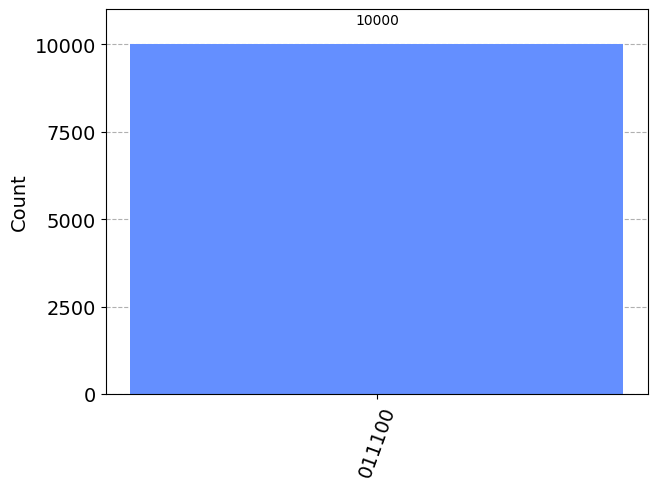

In [17]:
backend = Aer.get_backend('qasm_simulator')
counts = backend.run(qc, shots=10000).result().get_counts()

# Print the counts
print(counts)

# Plot the histogram of the counts
plot_histogram(counts)

### 5-bit Addition on Quantum Hardware

In [ ]:
realBackend = service.get_backend("ibm_kyoto")

transpiled_qc = transpile(qc, backend=realBackend)

counts = realBackend.run(transpiled_qc, shots=10000).result().get_counts()

print(counts)



In [ ]:
def plot_histogram(counts):
    # Create a new figure with a wider size
    plt.figure(figsize=(15, 6))  # Adjust the width and height as needed

    # Plot the histogram
    plt.bar(counts.keys(), counts.values())

    # Set labels and title
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.title('Histogram of Shots per Solution for a 5-bit Quantum Adder')

    # Rotate the x-axis labels by 45 degrees
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

plot_histogram(counts)


# Attempting to Reverse the Circuit
The 3-bit circuit is reversed and outputs some result but not the correct one, when using the qasm simulator

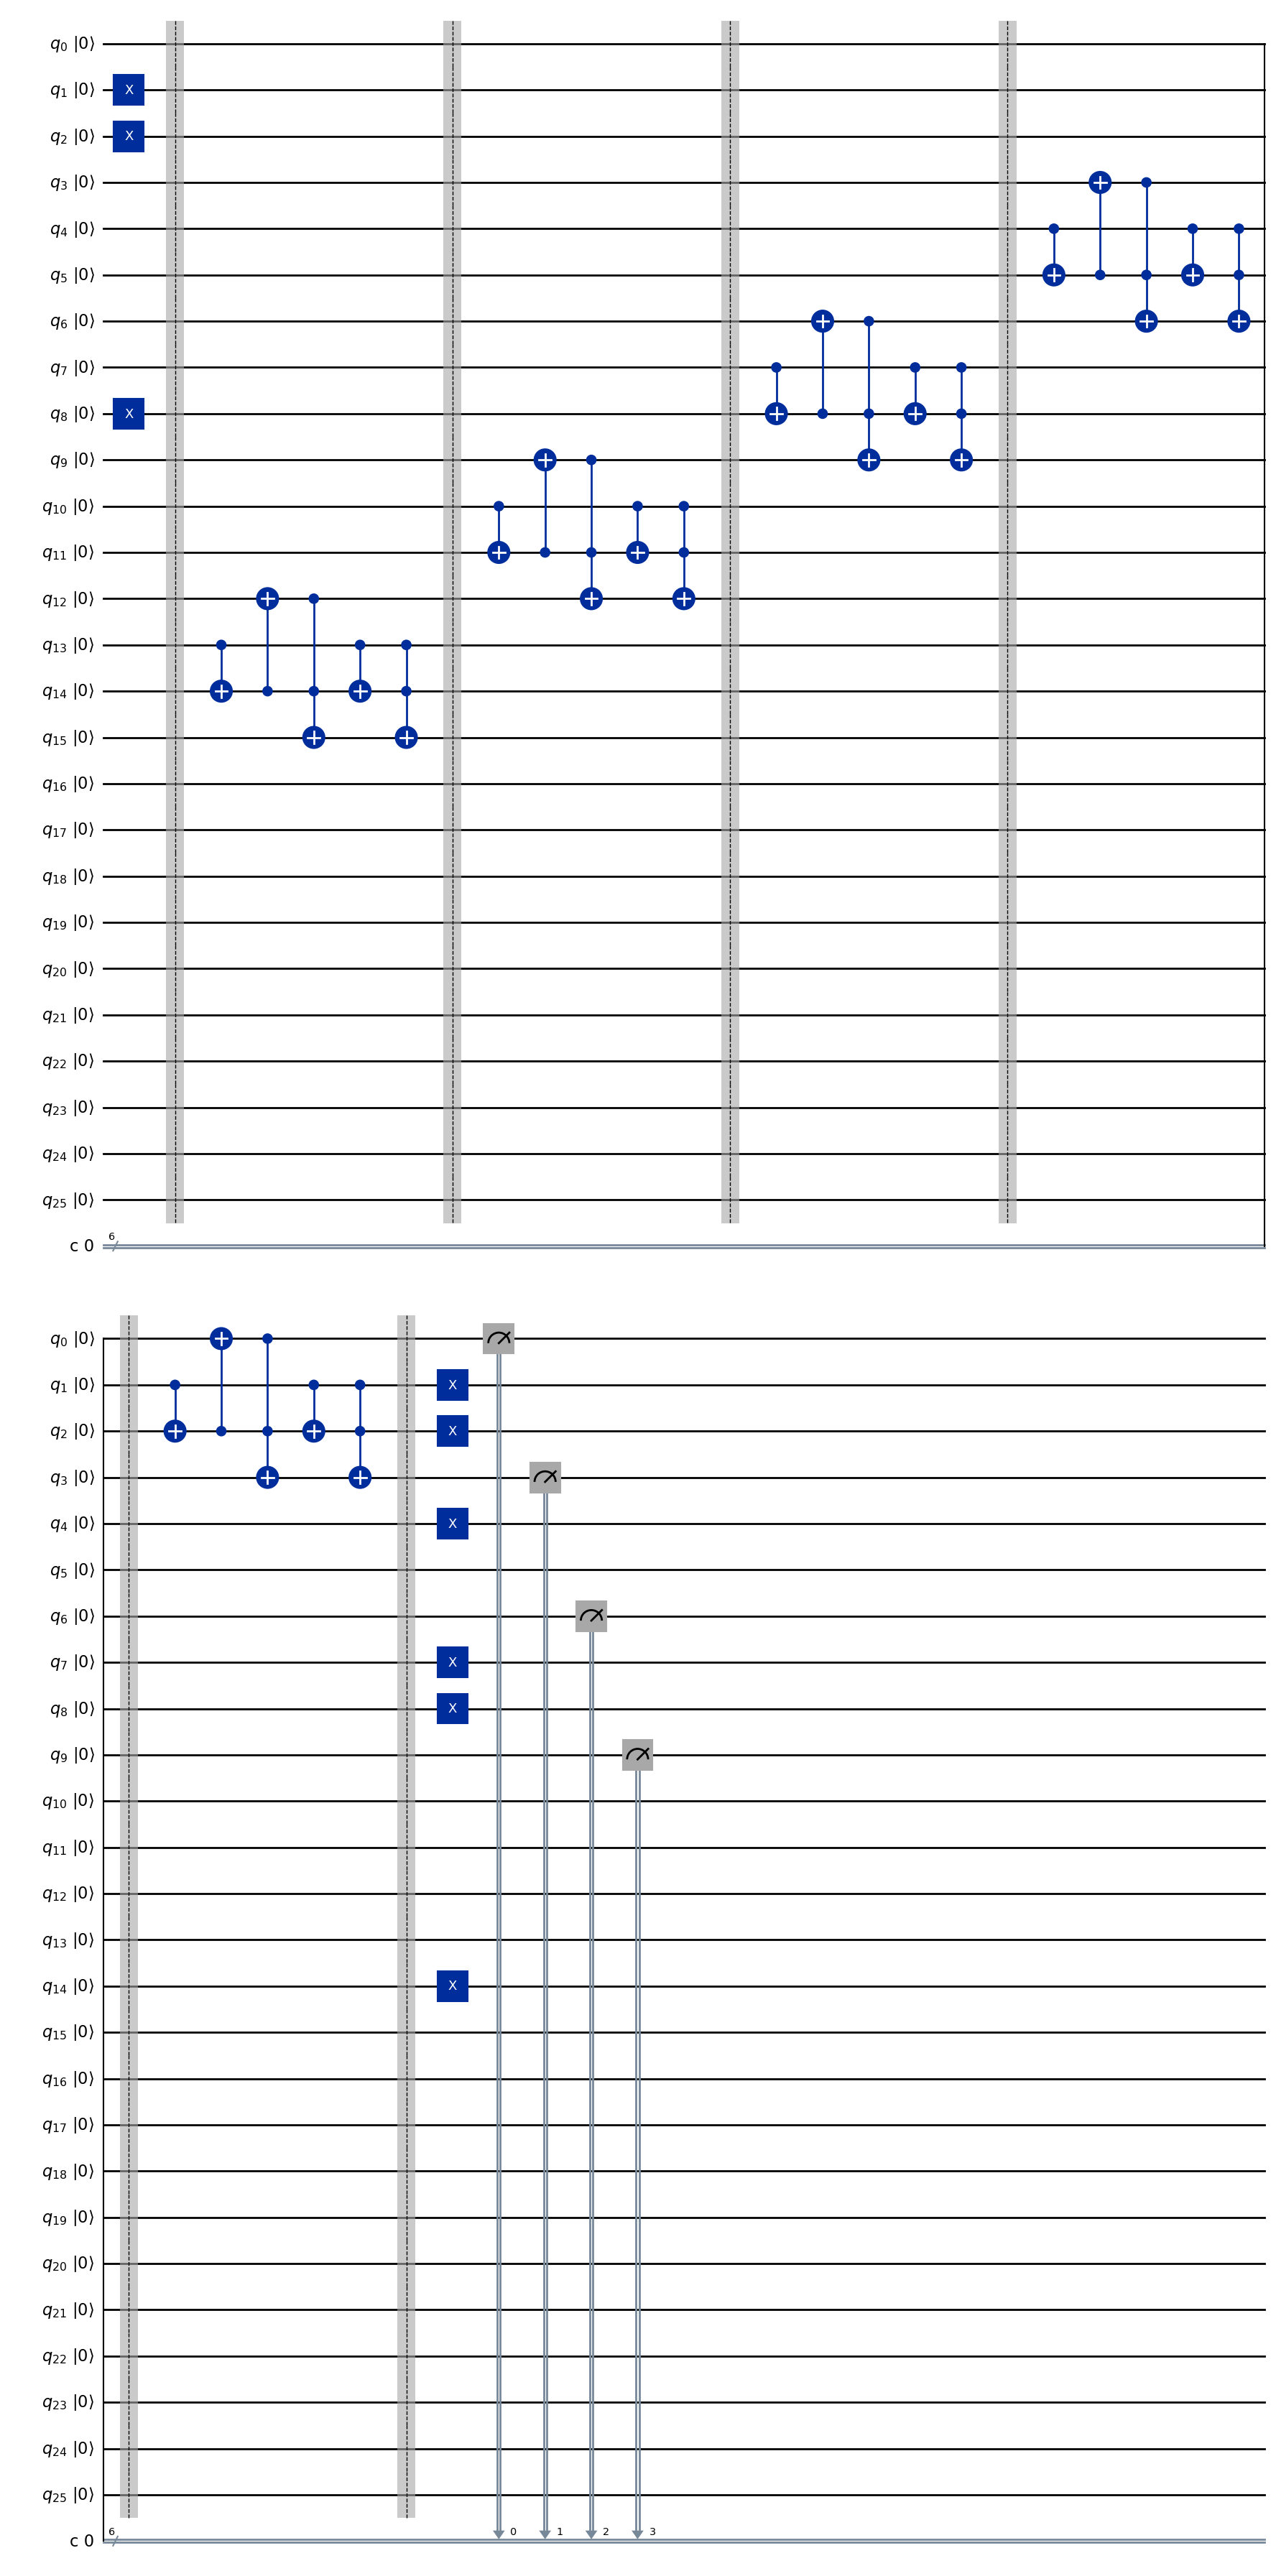

In [21]:
def reverse_circuit(original_circuit):
    # Create a new quantum circuit for the reversed operations
    reversed_circuit = QuantumCircuit(original_circuit.num_qubits, original_circuit.num_clbits)
    
    # Iterate through the operations in the original circuit in reverse order
    for operation in reversed(original_circuit):
        # Get the operation details
        gate, qubits, _ = operation
        
        # Skip measurement operations
        if gate.name == "measure":
            continue
        
        # Add the inverse of the gate to the reversed circuit
        reversed_circuit.append(gate.inverse(), qubits)
    
    return reversed_circuit

qc = QuantumCircuit(n * n + 1, n + 1)
qc = full_adder(qc, a_input, b_input)
# This has no results because the 1 bits, from X gates, are at the end of the circuit, so they are added at the beginning.
qc.x(1)
qc.x(2)
qc.x(8)

# Create the reversed circuit
reversed_qc = reverse_circuit(qc)


reversed_qc.measure([0,3,6,9], [0,1,2,3])
reversed_qc.draw(plot_barriers=True, initial_state=True, scale=1, output='mpl')

{'001110': 10000}


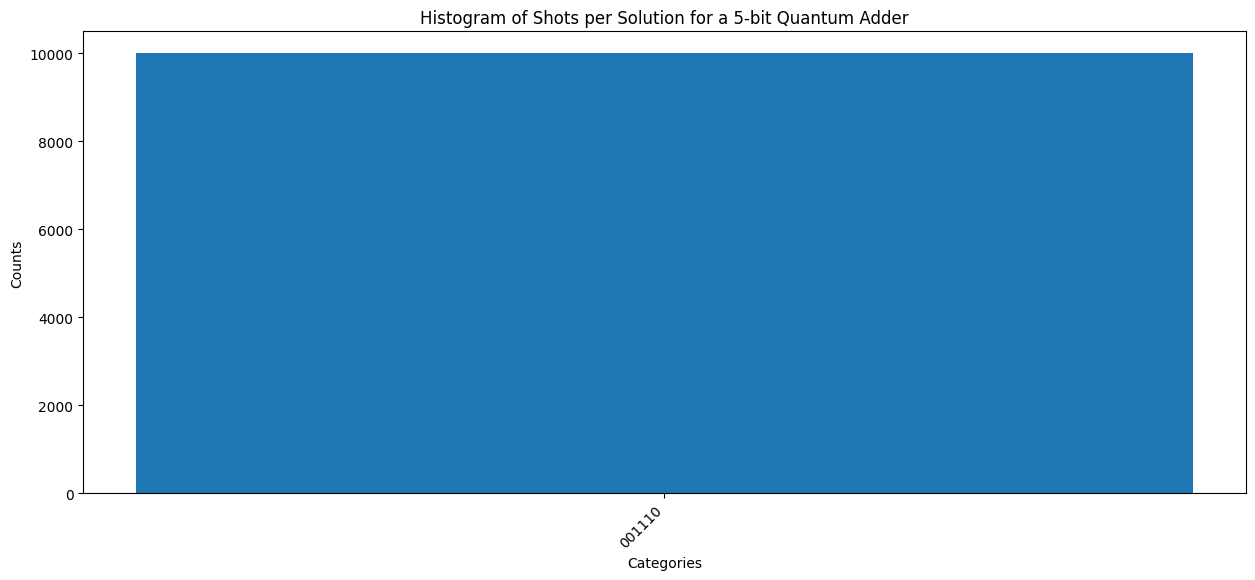

In [22]:
backend = Aer.get_backend('qasm_simulator')
counts = backend.run(reversed_qc, shots=10000).result().get_counts()

# Print the counts
print(counts)

# Plot the histogram of the counts
plot_histogram(counts)